In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as scl
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

#Clase

class WaveFunction:
    
    def __init__(self,f,x,m,hbar): #Constructor
        
        self.domin=x  #Dominio
        self.m=m #Masa
        self.potential=f(x) #Potencial
        self.hbar=hbar #Constante de Planck
        self.h = self.domin[1]-self.domin[0] #Paso, se pone de tal forma que cubra todo el intervalo
        self.Mdd = 1./(self.h**2)*(np.diag(np.ones(len(self.domin)-1),-1) -2* np.diag(np.ones(len(self.domin)),0) + np.diag(np.ones(len(self.domin)-1),1)) #Matriz de segunda derivada
        self.H = -(hbar**2)/(2.0*m)*self.Mdd + np.diag(self.potential)  #Hamiltoniano
        self.E, self.psiS = np.linalg.eigh(self.H)  #Solución autovalores y autovectores
        self.psi = np.transpose(self.psiS)  #Transpone la linea anterior
        
    def plot(self): #Grafico del potencial
        return plt.plot(self.domin,self.potential)
    
    def Energy(self,n): #Autovalores
        E=[]
        for i in range(n):
            E.append(self.E[i])
            
        return np.array(E) #Devuelve los primeros n autovalores
    
    def solution(self,n,b): # Grafica las primeras n autofunciones
        
        N=len(self.domin)
        
        plt.figure(figsize=(10,7))
        
        plt.xlim(-b,b)
        
        plt.xlabel('$x$',fontsize=15)
        
        plt.ylabel('$\psi_{n}(x)$',fontsize=15)
    
        for i in range(n):
            if self.E[i]>0:                 
                if self.psi[i][int(N/2)] < 0: #Esta condición multiplica por menos a las soluciones que estan invertidas respecto a las analiticas,
                #Esto puede pasar debido a que linalg retorna los autovectores con signo arbitrario
                
                    plt.plot(self.domin,-self.psi[i]/np.sqrt(self.h),label="$E_{}$={:>8.3f}".format(i,self.E[i]))
                    
                else:
                    plt.plot(self.domin,self.psi[i]/np.sqrt(self.h),label="$E_{}$={:>8.3f}".format(i,self.E[i]))
    
    def Density(self,n,b): #Devuelve un gráfico con las primeras n densidades de probabilidad
        
        N=len(self.domin)
        
        plt.figure(figsize=(10,7))
        
        plt.xlim(-b,b)
        
        plt.xlabel('$x$',fontsize=15)
        
        plt.ylabel('$|\psi(x)_{n}|^{2}$',fontsize=15)
        
        for i in range(n):
            if self.E[i]>0:                 
                  plt.plot(self.domin,abs(self.psi[i]/np.sqrt(self.h))**2,label="$E_{}$={:>8.3f}".format(i,self.E[i]))
                    
    
    def Density_CT(self,t,b): #Recibe tiempo e intervalo de graficaciónl, para graficar la combinación lineal pedida
        y=0

        for j in range(0,4):
            y+=self.psi[j]*np.exp(-1j*self.E[j]*t)
            
        plt.figure(figsize=(10,7))
            
        plt.xlim(-b,b)
        
        plt.title('Modulo cuadrado de combinación lineal de funciones de onda')
        
        plt.xlabel('$x$')
        
        plt.ylabel('$|\psi(x,t_{0})|$')
        
        plt.plot(self.domin,0.5*abs(y)**2,label='$|\sum_{i=1}^{4}c_{n}\psi_{n}(x,t_{0})e^{-iE_{n}t_{0}/ \hbar}|^{2}$')
        
        plt.legend()

    def Combinacion_Ani(self,b,a): #Animación de la parte real de la combinación lineal.
        
        fig = plt.figure()
        
        ax = plt.axes(xlim=(-b, b), ylim=(-a, a))
        
        line, = ax.plot([], [], lw=3)

        def init():
            line.set_data([], [])
            return line,
        def animate(i):
            y=0
            for j in range(0,4):
                y+=self.psi[j]*np.cos(self.E[j]*i)
            line.set_data(self.domin, 0.5*y)
            return line,

        anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=40, blit=True)


        anim.save('Combinacion_Ani.gif', writer='imagemagick')
    
    
    
    def Density_CTAni(self,b,a):
        
        fig = plt.figure()
        ax = plt.axes(xlim=(-b, b), ylim=(-a, a))
        line, = ax.plot([], [], lw=3)

        def init():
            line.set_data([], [])
            return line,
        def animate(i):
            y=0
            for j in range(0,4):
                y+=self.psi[j]*np.exp(-1j*self.E[j]*i)
                line.set_data(self.domin, 0.5*abs(y)**2)
            return line,

        anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=40, blit=True)


        anim.save('Density_CTAni.gif', writer='imagemagick')

        
        

        
        
        
    
        
        


# Pozo finito de potencial


Denición de objeto

In [24]:

N = 4097 #Número de pasos

a = 200.0 # #Dominio

b=6. #Ancho del pozo

z=np.linspace(-a/2.,a/2.,N) #Intervalo

def f(x):  #Potencial 
    V0 = 6. #Valor del potencial
    V=np.zeros(N) #array de zeros donde ira el potencial
    for i in range(N): #Condición para
        if x[i]< -b/2. or x[i]> b/2.:
            V[i]= V0
    return V

a=WaveFunction(f,z,1.,1.) #Creación de objeto


# 1)

In [25]:
E=a.E #Contiene las energías
psi=a.psi #Contiene las funciones de Onda  

In [26]:
E

array([1.13727252e-01, 4.54074661e-01, 1.01834436e+00, ...,
       8.44858717e+02, 8.44860279e+02, 8.44860279e+02])

In [27]:
psi

array([[ 8.55671815e-21,  1.69513347e-20,  1.67890522e-20, ...,
        -7.13040028e-21, -1.32424120e-20, -5.90751714e-21],
       [ 1.49664932e-18,  3.01719422e-18,  3.01984451e-18, ...,
        -1.18962469e-18, -2.24095139e-18, -8.10534430e-19],
       [ 7.89679346e-20,  1.59593332e-19,  1.58599061e-19, ...,
        -6.92068931e-20, -1.19606387e-19, -9.83459846e-20],
       ...,
       [-7.62733283e-05,  1.52545899e-04, -2.28816954e-04, ...,
        -1.93254317e-04,  1.28837278e-04, -6.44189591e-05],
       [ 3.81370720e-05, -7.62740494e-05,  1.14410837e-04, ...,
         9.66270314e-05, -6.44181543e-05,  3.22091171e-05],
       [-3.22091171e-05,  6.44181543e-05, -9.66270314e-05, ...,
         1.14410837e-04, -7.62740494e-05,  3.81370720e-05]])

# 2)

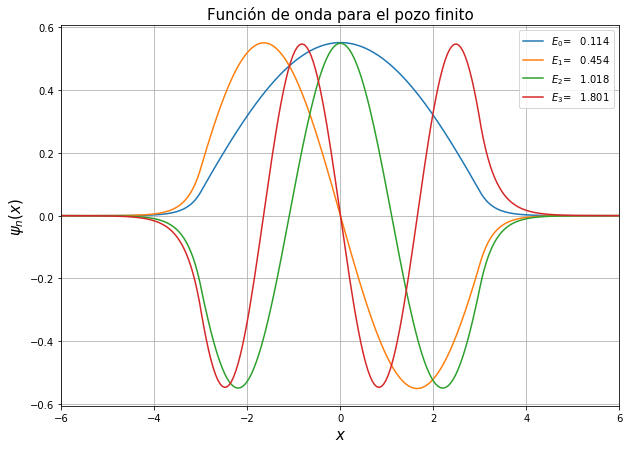

In [28]:
a.solution(4,b)
plt.title('Función de onda para el pozo finito',fontsize=15)
plt.legend()
plt.grid()


# 3)

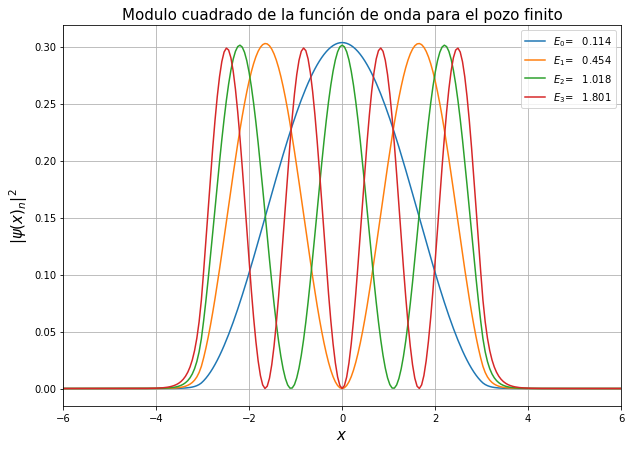

In [29]:
a.Density(4,b)
plt.title('Modulo cuadrado de la función de onda para el pozo finito',fontsize=15)
plt.legend()
plt.grid()


# 4)

In [8]:
%pylab

a.Combinacion_Ani(b,0.5)

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


C:\Users\esteb\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


# 5) 

# Animación



In [9]:
a.Density_CTAni(b,0.5)

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


# Plot


(-6.0, 6.0)

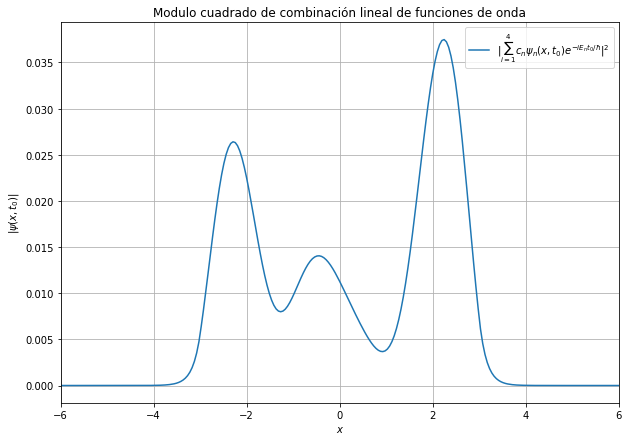

In [32]:
%matplotlib inline

a.Density_CT(2,b)  #t=2

plt.grid()
plt.xlim(-b,b)

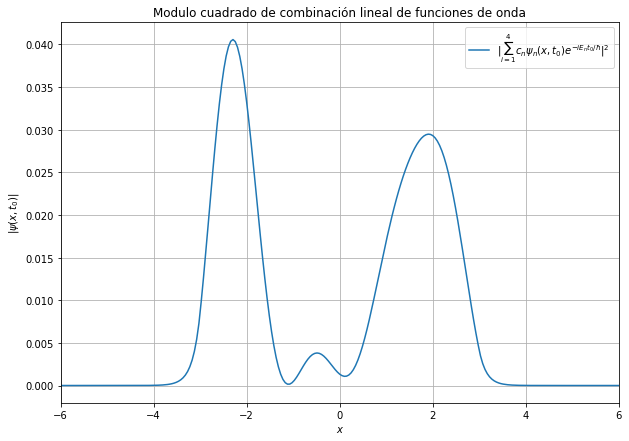

In [33]:
a.Density_CT(3,b)  #t=3

plt.xlim(-b,b)
plt.grid()

# 6) POZO INFINITO

In [34]:

N = 512. #Número de pasos

hbar=1.

m=1.

N = 512.

a = 1.0 #Ancho del pozo

z=np.linspace(-a/2.,a/2.,N) #Intervalo

V =lambda x: 0.*x #Define el pozo

a=WaveFunction(V,z,1.,1.) #Creación de objeto


C:\Users\esteb\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()


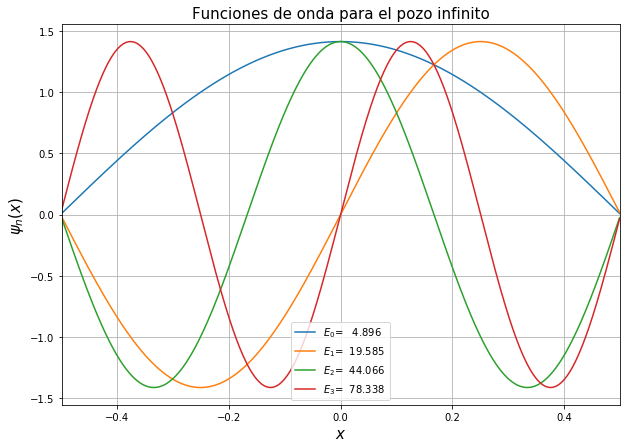

In [35]:
%matplotlib inline

a.solution(4,max(z))  

plt.title('Funciones de onda para el pozo infinito',fontsize=15)
plt.legend()
plt.grid()


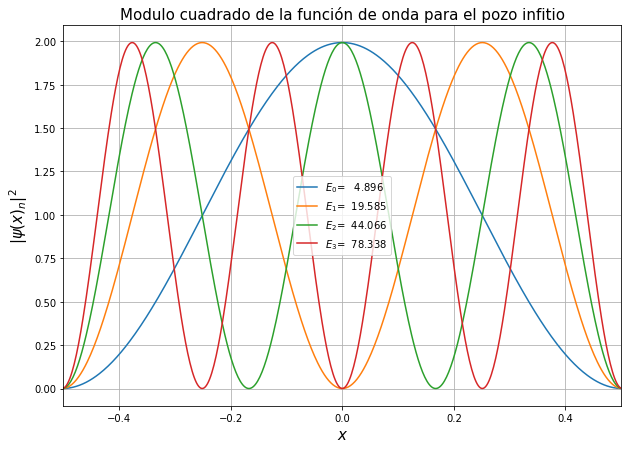

In [36]:
a.Density(4,max(z))
plt.title('Modulo cuadrado de la función de onda para el pozo infitio',fontsize=15)
plt.legend()
plt.grid()


In [18]:
%pylab


a.Combinacion_Ani(max(z),0.5)

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [16]:
a.Density_CTAni(max(z),0.1)

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


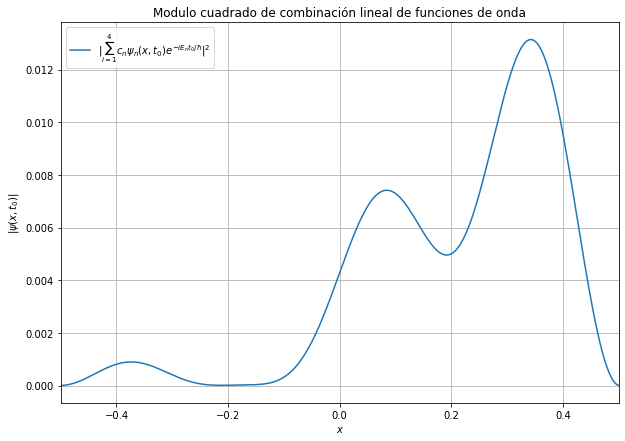

In [37]:
%matplotlib inline

a.Density_CT(1,max(z))
plt.xlim(-max(z),max(z))
plt.grid()

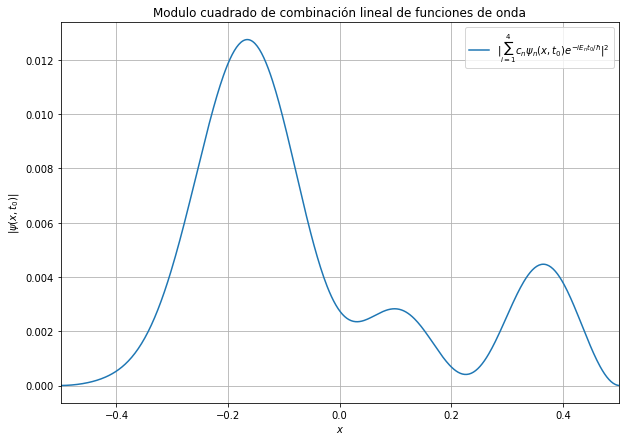

In [38]:
a.Density_CT(3,max(z))
plt.xlim(-max(z),max(z))
plt.grid()

# 2.3 Bonus

In [39]:
hbar=1
m=1
omega=1
N = 2014
a = 20.0
x = np.linspace(-a/2.,a/2.,N)

V = lambda z: .5*m*omega*z*z

a=WaveFunction(V,x,1.,1.) #Creación de objeto


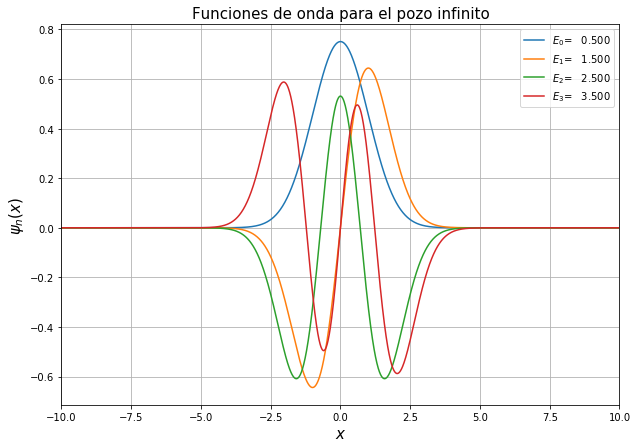

In [40]:
a.solution(4,max(x))
plt.title('Funciones de onda para el pozo infinito',fontsize=15)
plt.legend()
plt.grid()

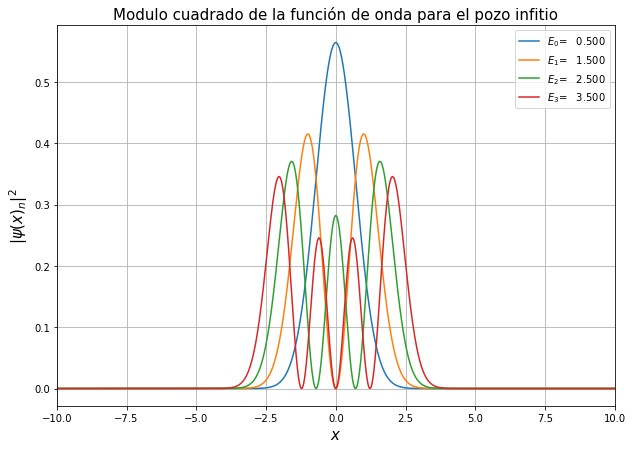

In [41]:
a.Density(4,max(x))
plt.title('Modulo cuadrado de la función de onda para el pozo infitio',fontsize=15)
plt.legend()
plt.grid()


Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


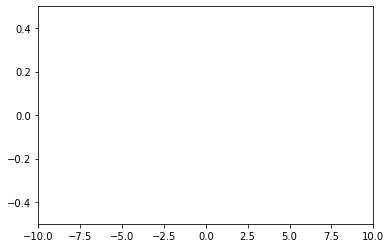

In [18]:
%pylab


a.Combinacion_Ani(max(x),0.5)

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


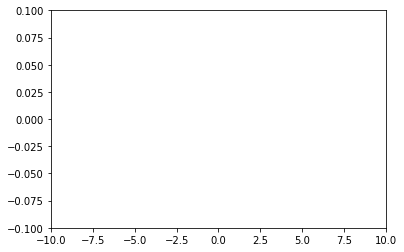

In [19]:
a.Density_CTAni(max(x),0.1)

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

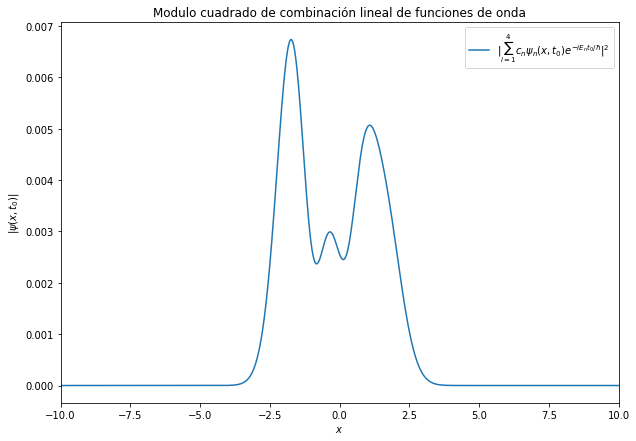

In [43]:
%matplotlib inline

a.Density_CT(1,max(x))
plt.xlim(-max(x),max(x))
plt.grid

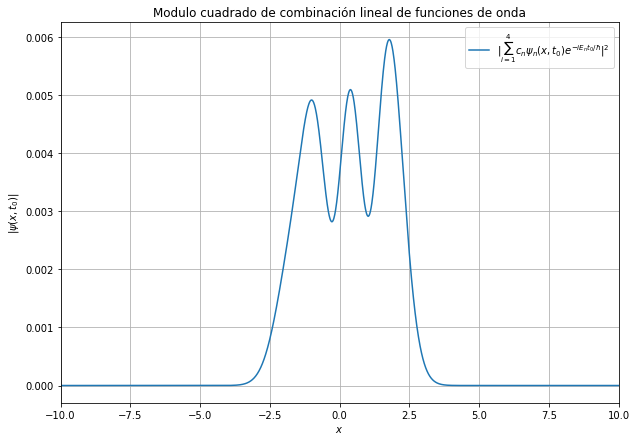

In [44]:
%matplotlib inline

a.Density_CT(4,max(x))
plt.xlim(-max(x),max(x))
plt.grid()